<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Scott's Workbook 
---

## Libraries and files

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing files

sat_2019 = pd.read_csv('../data/sat_2019.csv') 
act_2019 = pd.read_csv('../data/act_2019.csv')
g_rate_2019 = pd.read_csv('../data/grad_rate_2019.csv') # data taken from US News [https://www.usnews.com/education/best-high-schools/articles/see-high-school-graduation-rates-by-state]

## ACT cleaning

In [3]:
clean_act_2019 = act_2019.drop([51]) # dropping national row
clean_act_2019 = clean_act_2019.rename(columns={'Participation': 'ACT Participation', 'Composite': 'ACT Score' }) # replacing with headers that provide more context
# m_states_act = clean_act_2019[(clean_act_2019['ACT Participation'] == '100%')].sort_values(by="ACT Score", ascending=False) # states with mandatory testing
# clean_act_2019.info() # checking DF properties


## SAT cleaning

In [4]:
clean_sat_2019 = sat_2019.drop(columns=['EBRW', 'Math']) # dropping EBRW and math
clean_sat_2019 = clean_sat_2019.drop([39, 47]) # dropping PR and Virgin Islands (sorry!)
clean_sat_2019 = clean_sat_2019.reset_index(drop=True) # resetting index for removing PR and Virgin Islands
clean_sat_2019 = clean_sat_2019.rename(columns={'Participation Rate': 'SAT Participation', 'Total': 'SAT Score' }) # replacing with headers that provide more context

# clean_sat_2019.info() # checking DF properties

## States and graduation rate cleaning

In [5]:
clean_g_rate_2019 = g_rate_2019.drop(columns=['C', 'D', 'E']) # dropping C, D, E columns
clean_g_rate_2019 = clean_g_rate_2019.rename(columns={'ID':'State', 'Value':'Average HS Graduation Rate'})
clean_g_rate_2019 = clean_g_rate_2019.sort_values(by='State')

# clean_g_rate_2019.info() # checking DF properties

In [6]:
merge_act_gr = pd.merge(left=clean_act_2019, right=clean_g_rate_2019) # merge cleaned dataframes for ACT and Grad data
merge_sat_gr = pd.merge(left=clean_sat_2019, right=clean_g_rate_2019) # merge cleaned dataframes for ACT and Grad data

m_states_act = merge_act_gr[(merge_act_gr['ACT Participation'] == '100%')] # df of mandatory testing states for ACT
m_states_sat = merge_sat_gr[(merge_sat_gr['SAT Participation'] == '100%')] # df of mandatory testing states for SAT

non_states_act = merge_act_gr[(merge_act_gr['ACT Participation'] != '100%')] # df of NON-mandatory testing states for ACT
non_states_sat = merge_sat_gr[(merge_sat_gr['SAT Participation'] != '100%')] # df of NON-mandatory testing states for SAT

# EDA

In [7]:
clean_g_rate_2019.columns

Index(['State', 'Average HS Graduation Rate'], dtype='object')

In [8]:
non_states_act.describe()

,ACT Score,Average HS Graduation Rate
count,36.000000,36.000000
mean,22.336111,87.055556
std,2.005443,4.834072
min,18.800000,75.000000
25%,20.800000,85.000000
50%,22.400000,87.500000
75%,24.125000,91.250000
max,25.500000,94.000000


In [9]:
non_states_sat.describe()

,SAT Score,Average HS Graduation Rate
count,43.000000,43.000000
mean,1132.767442,87.697674
std,93.012502,4.778598
min,943.000000,75.000000
25%,1069.000000,85.000000
50%,1112.000000,89.000000
75%,1231.000000,92.000000
max,1284.000000,94.000000


In [10]:
(87.70 + 87.06) / 2

87.38

In [11]:
m_states_sat.describe()

,SAT Score,Average HS Graduation Rate
count,8.000000,8.000000
mean,1007.250000,87.500000
std,19.818822,2.828427
min,985.000000,82.000000
25%,994.500000,86.750000
50%,1001.000000,88.000000
75%,1015.750000,88.250000
max,1046.000000,92.000000


In [12]:
m_states_act.describe()

,ACT Score,Average HS Graduation Rate
count,15.000000,15.000000
mean,19.373333,89.133333
std,0.711604,3.292126
min,17.900000,83.000000
25%,18.900000,88.500000
50%,19.400000,89.000000
75%,19.900000,91.500000
max,20.300000,94.000000


In [13]:
(87.50 + 89.13) / 2

88.315

## EDA (ACT)

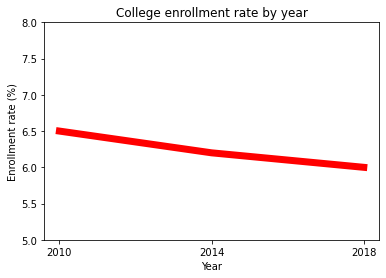

In [14]:
plt.plot(
    ['2010', '2014', '2018'], 
    [6.5, 6.2, 6.0], 
    color='red',
    lw=7,
) 
# data source: https://educationdata.org/college-enrollment-statistics 
plt.ylabel('Enrollment rate (%)')
plt.xlabel('Year')
plt.title('College enrollment rate by year')
plt.ylim([5, 8])
plt.savefig('college_rate.png', format="png")

In [15]:
clean_act_2019.columns

Index(['State', 'ACT Participation', 'ACT Score'], dtype='object')

In [16]:
ca2019 = clean_act_2019['ACT Participation'].str.rstrip('%').astype(float) / 100 
# this took a while to fix... but this link saved my bacon https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv

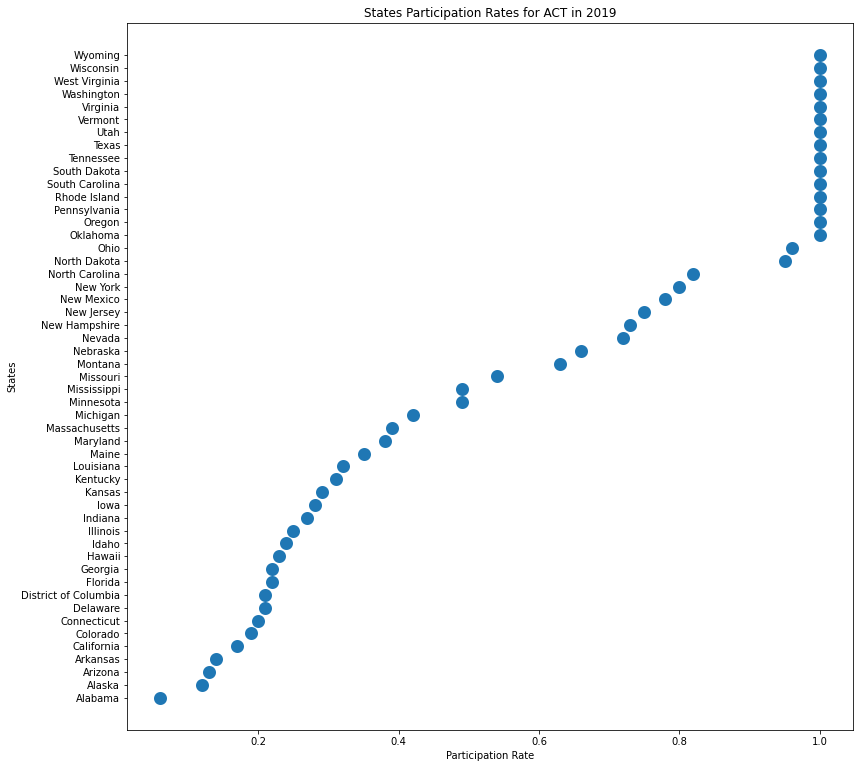

In [17]:
plt.figure(figsize=(13, 13))
plt.scatter(
    sorted(ca2019),
    clean_act_2019['State'],
    lw=7,
)
plt.xlabel('Participation Rate')
plt.ylabel('States')
plt.title('States Participation Rates for ACT in 2019');

# What's going on?

States with MANDATORY testing for both the ACT and SAT have an average HS graduation rate of 88.31 percent, while states with NON-mandatory testing have an average HS graduation rate of 87.38 percent. That's a difference of less than one percent.

NON-mandatory states participation rates are quite disparate (see example scatter plot above), which begs the question: why is there significant variance for participation rates in those states? (Perhaps it's the lack of positive correlation in MANDATORY states?)

With (arguably) little-to-no positive correlation between mandatory testing, HS graduation rates, and college enrolment (college entrance rates have been declining over the past 10 years), why the is standardized testing mandatory in ANY state?

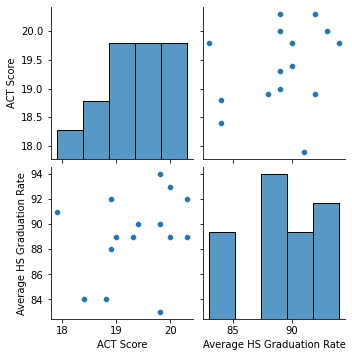

In [22]:
# MANDATORY states ACT + HS grad rate 
sns.pairplot(m_states_act);

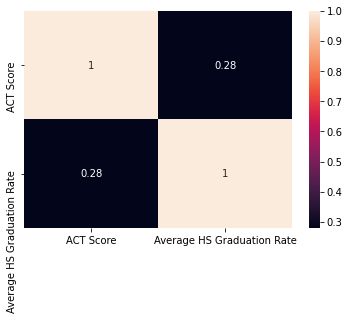

In [23]:
sns.heatmap(m_states_act.corr(), annot=True);

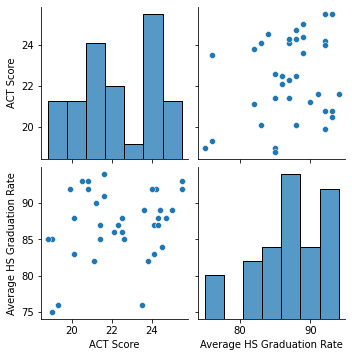

In [24]:
# NON-mandatory states ACT + HS grad rate
sns.pairplot(non_states_act);

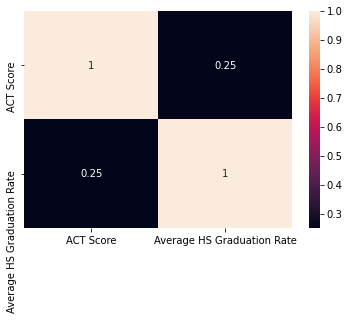

In [25]:
sns.heatmap(non_states_act.corr(), annot=True);

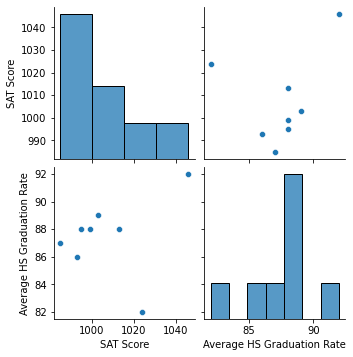

In [26]:
# MANDATORY states SAT + HS grad rate
sns.pairplot(m_states_sat)

<AxesSubplot:>

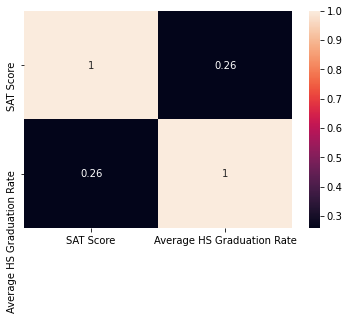

In [27]:
sns.heatmap(m_states_sat.corr(), annot=True)

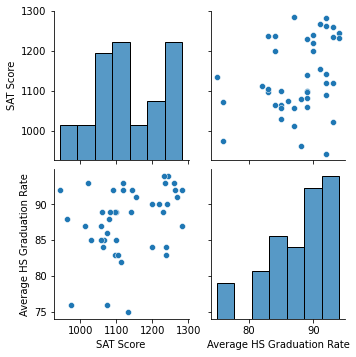

In [28]:
# NON-mandatory states SAT + HS grad rate
sns.pairplot(non_states_sat);

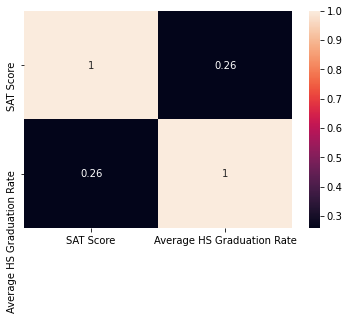

In [29]:
sns.heatmap(m_states_sat.corr(), annot=True);

### Sources
- HS Grad rate data https://www.usnews.com/education/best-high-schools/articles/see-high-school-graduation-rates-by-state
- Test-optional data https://www.usnews.com/education/best-colleges/articles/how-the-coronavirus-is-pushing-colleges-to-go-test-optional
- SAT (College Board) financial data https://www.totalregistration.net/AP-Exam-Registration-Service/Follow-The-Money-History-of-College-Board-Finances.php
- Poor schools can't afford standardized testing materials https://www.theatlantic.com/education/archive/2014/07/why-poor-schools-cant-win-at-standardized-testing/374287/
- Standardized testing costs https://www.edweek.org/teaching-learning/standardized-testing-costs-states-1-7-billion-a-year-study-says/2012/11?tkn=VLMFJUQpeyvKkTzwuCHPd%2FuQG%2BPWLRrD1lNp&cmp=clp-edweek
- *Inflation calculator https://www.usinflationcalculator.com/

